# Ahsan's submission for the Data Scientist Intern Role at Best Buy

I applied multiple modeling techniques to the prepared dataset (Decision tree, randomforest and XGBoost). It was found the XGBoost model gave us the best results. I then further improved it by tuning its hyperparameters.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import mean_squared_error
from geopy.distance import geodesic

In [2]:
df = pd.read_csv("data_train.csv")
print(df.shape)

(9222, 11)


In [3]:
df.head(3)

,Order-Date,Delivery-Date,Promised-Date,Courier,Size of the box height,Size of the box width,Size of the box length,Size of the box weight,Weather,Store address,Customer address
0,2021-01-24,2021-01-27,2021-01-26,PS,29.632656,34.722553,17.523058,3.807421,Good,'-123.048/49.1534','-126.07325247944962/51.29548801984406'
1,2021-04-09,2021-04-13,2021-04-13,FD,29.632656,34.722553,17.523058,1.902088,Good,'-123.048/49.1534','-126.07255765553835/51.29486187466757'
2,2021-09-27,2021-10-02,2021-10-02,PS,29.632656,34.722553,17.523058,2.152103,Good,'-123.048/49.1534','-126.07443435490822/51.29566033167437'


## Data Processing

##### Feature Engineering & Selection
- 'Distance' column generated by calculating the geodisc distance(kilometers) between the store and customer using their cordinates 
- 'Days_taken' column generated by (delivery date - order date)
- Courier encoded 1 or 0, 1 for PS and 0 for FD
- Weather encoded 1 or 0, 1 for good and 0 for bad
- Promised-Date column not needed for any predictions, dropped
    
    

In [4]:
#Checking for columns to convert
df.dtypes

Order-Date                 object
Delivery-Date              object
Promised-Date              object
Courier                    object
Size of the box height    float64
Size of the box width     float64
Size of the box length    float64
Size of the box weight    float64
Weather                    object
Store address              object
Customer address           object
dtype: object

In [5]:
#Checking for null/missing values
df.isnull().sum()

Order-Date                0
Delivery-Date             0
Promised-Date             0
Courier                   0
Size of the box height    0
Size of the box width     0
Size of the box length    0
Size of the box weight    0
Weather                   0
Store address             0
Customer address          0
dtype: int64

##### Generating 'Distance' column

In [6]:
# Firstly, this code cell will fix the formatting of our cordinate values in our dataframe for both customer and the store

#Removing quatation marks
df["Store address"] = df["Store address"].replace("'", "", regex=True)
df["Customer address"] = df["Customer address"].replace("'", "", regex=True)

#Converting to array for easier processing
store_address_array = np.array(df['Store address'])
customer_address_array = np.array(df['Customer address'])

#Splitting each cordinate by '/' and converting to float and appending to a new list
store_longitude = []
store_latitude = []
customer_longitude = []
customer_latitude = []

for x in store_address_array:
    store_longitude.append(float(x.split("/")[0]))
    store_latitude.append(float(x.split("/")[1]))
    
for x in customer_address_array:
    customer_longitude.append(float(x.split("/")[0]))
    customer_latitude.append(float(x.split("/")[1]))
    
#Adding our properly formatted longitude and latitude values to our dataframe
#This step is redundant but I do it for visual purposes
df['store_longitude'] = store_longitude
df['store_latitude'] = store_latitude

df['customer_longitude'] = customer_longitude
df['customer_latitude'] = customer_latitude

df.head(3)

,Order-Date,Delivery-Date,Promised-Date,Courier,Size of the box height,Size of the box width,Size of the box length,Size of the box weight,Weather,Store address,Customer address,store_longitude,store_latitude,customer_longitude,customer_latitude
0,2021-01-24,2021-01-27,2021-01-26,PS,29.632656,34.722553,17.523058,3.807421,Good,-123.048/49.1534,-126.07325247944962/51.29548801984406,-123.048,49.1534,-126.073252,51.295488
1,2021-04-09,2021-04-13,2021-04-13,FD,29.632656,34.722553,17.523058,1.902088,Good,-123.048/49.1534,-126.07255765553835/51.29486187466757,-123.048,49.1534,-126.072558,51.294862
2,2021-09-27,2021-10-02,2021-10-02,PS,29.632656,34.722553,17.523058,2.152103,Good,-123.048/49.1534,-126.07443435490822/51.29566033167437,-123.048,49.1534,-126.074434,51.295660


In [7]:
# Secondly, I calculate the distance between the customer and the store using the geodisc function from the geopy library

distance = []

for z in range(len(customer_longitude)):
    store_cords = (store_latitude[z], store_longitude[z])
    customer_cords = (customer_latitude[z], customer_longitude[z])
    distance.append(geodesic(store_cords, customer_cords).kilometers)
    
#Adding distance to our dataframe
df['Distance'] = distance

df.head(3)

,Order-Date,Delivery-Date,Promised-Date,Courier,Size of the box height,Size of the box width,Size of the box length,Size of the box weight,Weather,Store address,Customer address,store_longitude,store_latitude,customer_longitude,customer_latitude,Distance
0,2021-01-24,2021-01-27,2021-01-26,PS,29.632656,34.722553,17.523058,3.807421,Good,-123.048/49.1534,-126.07325247944962/51.29548801984406,-123.048,49.1534,-126.073252,51.295488,321.473027
1,2021-04-09,2021-04-13,2021-04-13,FD,29.632656,34.722553,17.523058,1.902088,Good,-123.048/49.1534,-126.07255765553835/51.29486187466757,-123.048,49.1534,-126.072558,51.294862,321.389102
2,2021-09-27,2021-10-02,2021-10-02,PS,29.632656,34.722553,17.523058,2.152103,Good,-123.048/49.1534,-126.07443435490822/51.29566033167437,-123.048,49.1534,-126.074434,51.295660,321.543559


##### Generating 'Days_taken' column 

In [8]:
#Convert date columns to proper format
df['Order-Date']= pd.to_datetime(df['Order-Date'])
df['Delivery-Date']= pd.to_datetime(df['Delivery-Date'])

#Creating days taken column
df['Days_taken'] = (df['Delivery-Date'] - df['Order-Date']).dt.days
df.head(3)

,Order-Date,Delivery-Date,Promised-Date,Courier,Size of the box height,Size of the box width,Size of the box length,Size of the box weight,Weather,Store address,Customer address,store_longitude,store_latitude,customer_longitude,customer_latitude,Distance,Days_taken
0,2021-01-24,2021-01-27,2021-01-26,PS,29.632656,34.722553,17.523058,3.807421,Good,-123.048/49.1534,-126.07325247944962/51.29548801984406,-123.048,49.1534,-126.073252,51.295488,321.473027,3
1,2021-04-09,2021-04-13,2021-04-13,FD,29.632656,34.722553,17.523058,1.902088,Good,-123.048/49.1534,-126.07255765553835/51.29486187466757,-123.048,49.1534,-126.072558,51.294862,321.389102,4
2,2021-09-27,2021-10-02,2021-10-02,PS,29.632656,34.722553,17.523058,2.152103,Good,-123.048/49.1534,-126.07443435490822/51.29566033167437,-123.048,49.1534,-126.074434,51.295660,321.543559,5


##### Encoding 'Couriers' and 'Weather' data

In [9]:
#Checking for unique values to replace
print("Couriers: ",df["Courier"].unique())
print("Weather types: ",df["Weather"].unique())

Couriers:  ['PS' 'FD']
Weather types:  ['Good' 'Bad']


In [10]:
# Encoding 1 or 0 
df.loc[df['Courier'] == 'PS', 'Courier'] = 1
df.loc[df['Courier'] == 'FD', 'Courier'] = 0

df.loc[df['Weather'] == 'Good', 'Weather'] = 1
df.loc[df['Weather'] == 'Bad', 'Weather'] = 0

#Convert 'Courier' and 'Weather' column to the represent int values
df['Courier'] = df['Courier'].astype(str).astype(int)
df['Weather'] = df['Weather'].astype(str).astype(int)

df.head(3)

,Order-Date,Delivery-Date,Promised-Date,Courier,Size of the box height,Size of the box width,Size of the box length,Size of the box weight,Weather,Store address,Customer address,store_longitude,store_latitude,customer_longitude,customer_latitude,Distance,Days_taken
0,2021-01-24,2021-01-27,2021-01-26,1,29.632656,34.722553,17.523058,3.807421,1,-123.048/49.1534,-126.07325247944962/51.29548801984406,-123.048,49.1534,-126.073252,51.295488,321.473027,3
1,2021-04-09,2021-04-13,2021-04-13,0,29.632656,34.722553,17.523058,1.902088,1,-123.048/49.1534,-126.07255765553835/51.29486187466757,-123.048,49.1534,-126.072558,51.294862,321.389102,4
2,2021-09-27,2021-10-02,2021-10-02,1,29.632656,34.722553,17.523058,2.152103,1,-123.048/49.1534,-126.07443435490822/51.29566033167437,-123.048,49.1534,-126.074434,51.295660,321.543559,5


##### Droping columns we don't need anymore

In [11]:
df = df.drop(columns=['Order-Date', 'Delivery-Date', 'Promised-Date', 'Store address', 'Customer address', 'store_longitude', 'store_latitude', 'customer_longitude', 'customer_latitude'])

##### Our Prepared Dataset

In [12]:
df.head()

,Courier,Size of the box height,Size of the box width,Size of the box length,Size of the box weight,Weather,Distance,Days_taken
0,1,29.632656,34.722553,17.523058,3.807421,1,321.473027,3
1,0,29.632656,34.722553,17.523058,1.902088,1,321.389102,4
2,1,29.632656,34.722553,17.523058,2.152103,1,321.543559,5
3,1,29.632656,34.722553,17.523058,3.802455,1,321.476244,5
4,0,29.632656,34.722553,17.523058,5.510081,1,321.389395,6


## Statistical Analysis & Visualizations

In [13]:
df.describe()

,Courier,Size of the box height,Size of the box width,Size of the box length,Size of the box weight,Weather,Distance,Days_taken
count,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000
mean,0.459770,36.062849,45.278756,21.191050,4.986162,0.832791,407.128658,7.888853
std,0.498406,14.943197,15.751496,8.735953,4.928290,0.373182,299.610915,6.607311
min,0.000000,29.632656,28.000000,17.523058,0.004348,0.000000,0.070242,1.000000
25%,0.000000,29.632656,34.722553,17.523058,2.195928,1.000000,175.771850,3.000000
50%,0.000000,29.632656,34.722553,17.523058,3.474347,1.000000,321.397798,5.000000
75%,1.000000,42.613262,67.558550,22.971280,6.271585,1.000000,641.713906,16.000000
max,1.000000,151.130000,67.558550,63.172726,49.429657,1.000000,1176.256765,25.000000


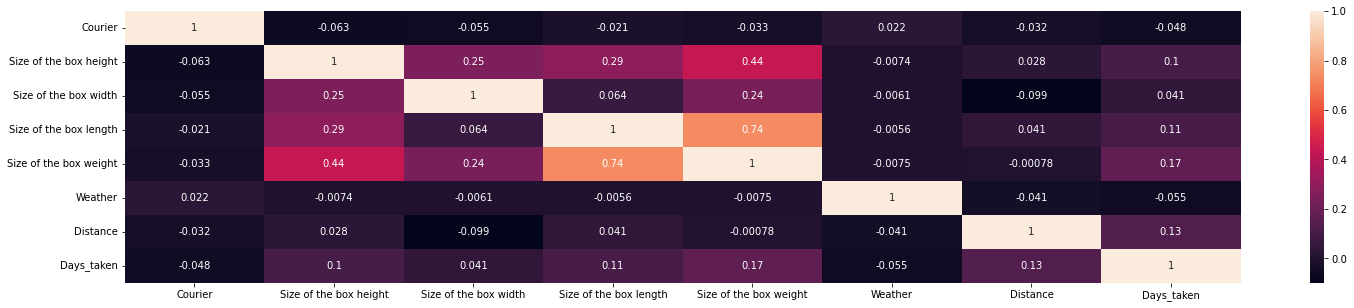

In [14]:
#ploting  heat map of our dataset's correlations

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,5))

g=sns.heatmap(df[top_corr_features].corr(),annot=True)

##### By observing the last row (Days_taken) on the heat map we see that the box height, box length, box weigth and distance seem to be the most correlated to the number of days taken for delivery. I will now observe their relation to the days taken for delivery.

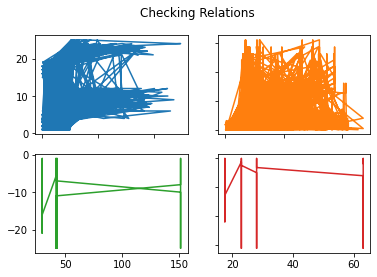

In [15]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Checking Relations')
ax1.plot(df['Size of the box weight'], df['Days_taken'])
ax2.plot(df['Distance'], df['Days_taken']**2, 'tab:orange')
ax3.plot(df['Size of the box height'], -df['Days_taken'], 'tab:green')
ax4.plot(df['Size of the box length'], -df['Days_taken']**2, 'tab:red')

for ax in fig.get_axes():
    ax.label_outer()

There is no linear relation between our features and our target, hence a multi linear regression will not give us good results. I will start the regression analysis with a decision tree as it does a better job at capturing the non-linearity in the data and move on from there.

#### Preparing Data for Regression Analysis

In [16]:
df_array = np.array(df)

In [17]:
#Seperating featuers and target
X = df_array[:, :-1]
y = df_array[:, -1]

print('Features:',X.shape)
print('Target:',y.shape)

Features: (9222, 7)
Target: (9222,)


In [18]:
#Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Scaling of our data is not needed as I am using Decision Trees and Ensemble methods

## Regression Analysis: Decision Tree

In [19]:
from sklearn.tree import DecisionTreeRegressor

#Applying a decision tree regressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [20]:
#Predicting
y_pred = dt_regressor.predict(X_test)

###### Evaluating Model Metrics

In [21]:
score = dt_regressor.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print('R-square:',score)
print('rmse:',rmse)

R-square: 0.7893239081441811
rmse: 3.107993017399808


## Regression Analysis: Random Forest

In [22]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regression = RandomForestRegressor(random_state=0)
random_forest_regression.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [23]:
#Predicting
y_pred = random_forest_regression.predict(X_test)

###### Evaluating Model Metrics

In [24]:
score = random_forest_regression.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('R-square:',score)
print("RMSE: %f" % (rmse))

R-square: 0.8792850061476898
RMSE: 2.352627


###### Improvement from DT

## Regression Analysis: XGBoost

In [25]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [26]:
#Predicting
y_pred = xgb_model.predict(X_test)

In [27]:
score = xgb_model.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


print('R-square:',score)
print("RMSE: %f" % (rmse))

R-square: 0.9054964884874498
RMSE: 2.081596


##### Here we can see that out of all the base models, XGBoost gave us an R2 score closest to 1, and the closest Root mean square error to 0. Hence, I will now optimize the hyperparameters of the XGBoost model.

## XGBoost Hyperparameter Tuning

In [28]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [29]:
## Hyperparameters I am optimizing

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "n_estimators"     : [ 50, 100, 200, 300, 500, 700, 1000 ],
 "subsample"        : [ 0.1, 0.3, 0.5, 0.7, 0.9 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7, 0.9, 1 ]
    
}

In [35]:
#Using Randomized search for optimization, cross validation = 5
random_search=RandomizedSearchCV(xgb_model,param_distributions=params,n_iter=5,scoring=None,n_jobs=-1,cv=5)
random_search.fit(X_train,y_train)

#Obtaining the best values for the parameters we are tuning
random_search.best_params_

{'subsample': 0.7,
 'n_estimators': 700,
 'max_depth': 3,
 'learning_rate': 0.25,
 'colsample_bytree': 0.9}

### Fitting a XGBoost Regressor with our best found Hyperparaters

In [36]:
tuned_xgb = XGBRegressor(n_estimators=700, max_depth=3, learning_rate=0.25, subsample=0.7, colsample_bytree=0.9)
tuned_xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.25, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=700, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
y_pred = tuned_xgb.predict(X_test)

In [39]:
score = tuned_xgb.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('R-square:',score)
print("RMSE: %f" % (rmse))

R-square: 0.9175218030109148
RMSE: 1.944652


The Tuned XGBoost model has given us slighty better results, not significant but better nonetheless. **tuned_xgb** is my best model.

## Predicting on the Test CSV

Performing the same data preprocessing

In [40]:
#Running the data_test csv through the same process
test_data = pd.read_csv('data_test.csv')

test_data["Store address"] = test_data["Store address"].replace("'", "", regex=True)
test_data["Customer address"] = test_data["Customer address"].replace("'", "", regex=True)

store_address_array = np.array(test_data['Store address'])
customer_address_array = np.array(test_data['Customer address'])

store_longitude = []
store_latitude = []
customer_longitude = []
customer_latitude = []

for x in store_address_array:
    store_longitude.append(float(x.split("/")[0]))
    store_latitude.append(float(x.split("/")[1]))
    
for x in customer_address_array:
    customer_longitude.append(float(x.split("/")[0]))
    customer_latitude.append(float(x.split("/")[1]))
    
test_data['store_longitude'] = store_longitude
test_data['store_latitude'] = store_latitude

test_data['customer_longitude'] = customer_longitude
test_data['customer_latitude'] = customer_latitude

distance = []

for z in range(len(customer_longitude)):
    store_cords = (store_latitude[z], store_longitude[z])
    customer_cords = (customer_latitude[z], customer_longitude[z])
    distance.append(geodesic(store_cords, customer_cords).kilometers)
    
test_data['Distance'] = distance



test_data.loc[test_data['Courier'] == 'PS', 'Courier'] = 1
test_data.loc[test_data['Courier'] == 'FD', 'Courier'] = 0

test_data.loc[test_data['Weather'] == 'Good', 'Weather'] = 1
test_data.loc[test_data['Weather'] == 'Bad', 'Weather'] = 0


test_data['Courier'] = test_data['Courier'].astype(str).astype(int)
test_data['Weather'] = test_data['Weather'].astype(str).astype(int)

test_data = test_data.drop(columns=['Order-Date', 'Promised-Date', 'Store address', 'Customer address', 'store_longitude', 'store_latitude', 'customer_longitude', 'customer_latitude'])

test_data_array = np.array(test_data)
print(test_data_array.shape)

(3222, 7)


##### Predicting

In [42]:
#Predictions
test_predictions = tuned_xgb.predict(test_data_array)
test_predictions = np.round(test_predictions, 0)

In [43]:
#Outputing CSV
predicted_days_df = pd.DataFrame(test_predictions, columns=['Number of Days'])
predicted_days_df.to_csv('Ahsan_Khan.csv',index=False)
predicted_days_df

,Number of Days
0,7.0
1,11.0
2,6.0
3,10.0
4,6.0
...,...
3217,9.0
3218,9.0
3219,3.0
3220,2.0


## Further Improvements

The variables of the weather feature are sort of vague in the sense 'bad' can be referring to very low temperatures OR a lot of snow. For example, 30 cm of snow at -4 celcius would impact the delivery time more compared to a temperature of -30 celcius but no snow. Hence, this feature can be further expanded into observing the snow on the ground and precipitation. Historical weather data of the area around stores and customers can be found here: https://climate.weather.gc.ca/historical_data/search_historic_data_e.html. 

Here is the weather data around the burnaby store in 2021.

In [44]:
weather_data = pd.read_csv('richmond_nature_park_2021_weather_data.csv')
weather_data.head(3)

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-123.09,49.17,RICHMOND NATURE PARK,1106PF7,2021-01-01,2021,1,1,†,10.0,...,0.0,NaN,8.2,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,-123.09,49.17,RICHMOND NATURE PARK,1106PF7,2021-01-02,2021,1,2,†,9.0,...,0.0,NaN,12.2,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,-123.09,49.17,RICHMOND NATURE PARK,1106PF7,2021-01-03,2021,1,3,†,10.0,...,0.0,NaN,18.6,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [45]:
print('Max snow in a day for 2021 (Centimeters):',weather_data['Total Snow (cm)'].max())
print('Lowest temperature in a day in 2021(Celcius):',weather_data['Mean Temp (°C)'].min())
print('Max rain (millimeters) in a day',weather_data['Total Rain (mm)'].max())

Max snow in a day for 2021 (Centimeters): 25.0
Lowest temperature in a day in 2021(Celcius): -9.8
Max rain (millimeters) in a day 78.8


For example, the cell above shows us the worst weather conditions on different days of the year 2021 around the burnaby store. Each of these would have a different impact on the delivery time depending on the combination of these three weather conditions.

The feature 'weather' in our dataset represents the conditions between some range of dates (maybe between order-date and promised-date?). So a similar approach can be taken for future predictions on the test dataset by including the weather forecast of the possibile snow, rain and temperature in that same range of dates.

I would like to thank you for giving me the opportunity to work on Best Buy's dataset, I had a good time working on this challenge.
##### Best Regards, Ahsan